In [1]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis
slim = tf.contrib.slim
#import clr

print(tf.__version__)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = [[1.0,10.0,12.0,10.0],[3.0,2.0,5.0,10.0],[3.0,10.0,5.0,2.0]]
print(x)
print(np.shape(x))
X = x 
tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0)) ,3.0),axis=0).eval(session = sess )
tf.pow(tf.reduce_mean(tf.square(tf.subtract(X ,tf.reduce_mean(X , axis=0))), axis=0),1.5).eval(session = sess )
tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0)),4.0) , axis = 0 ).eval(session = sess )

In [2]:
# ## https://github.com/mhmoodlan/cyclic-learning-rate

# import tensorflow as tf
# import clr
# import matplotlib.pyplot as plt



# print(tf.executing_eagerly()) # => False

# rates = []
# print("one of {triangular, triangular2, exp_range}")
# with tf.Session() as sess:
#     for i in range(0, 300):
#         rates.append(sess.run(clr.cyclic_learning_rate(i, mode='triangular', 
#                                                        gamma=.997 , learning_rate=0.0001,
#                                                        max_lr=0.01,
#                                                        step_size=40.)))

# plt.xlabel('iterations (epochs)')
# plt.ylabel('learning rate')
# plt.plot(range(len(rates)), rates)


In [3]:
columns = ['SCORE_ORG', 'SCORE_NK0200_000', 'SCORE_RK0400_700',
           'CNT_CONTACT_POS','CNT_ENG', 'DAYS_CONTACT_POS',
           'DAYS_CALL_PAYMENT','EWS_C_N_P27000100',
           'EWS_A_K_D1M232000_OPR', 'EWS_C_N_P42000200','EWS_C_N_P32003000',
           'AGE','CNT_Contact','EWS_A_K_D1M23200C_OPR',
           'EWS_C_K_D10310000_OPR','EWS_A_K_D90232200_OPR',
           'D_N_CA0000603','EWS_C_N_P32002600','EWS_D_N_P43004000',
           'C_N_PS0001777','A_K_D10220000_OPR','SCORE_RK0400_000',
           'D_K_D10310000_OPR','D_K_L2Z000034','D_K_L20283000','EWS_D_K_L20283000',
           'EWS_D_N_P43004500','D_K_L2Z000035','EWS_A_K_D10231000_OPR',
           'DAYS_CONTACT','EWS_D_K_L2Z000035','SC0000059','D_N_L24003800',
           'MOB','SC0000063','EWS_A_K_D10232000_OPR','TF_N_CRT000021',
           'EWS_C_K_D10220000_OPR','SC0000055','SC0000049',
           'EWS_C_K_D10210D00_OPR','D_N_P21010500','EWS_C_K_D10110000_OPR',
           'EWS_A_N_L22002000','target']

print(len(columns))

45


In [4]:
input_col = 45

col = np.random.choice( columns ,  input_col , replace=False ).tolist()

In [5]:
data = pd.read_csv("./../data/credit44_sc.csv" ,usecols=col )

In [6]:
fac_var = []
num_var = []
for i in list(data) : 
    if data[i].nunique() < 15 : 
        print("factor variable : {}".format(i))
        fac_var.append(i)
        if data[i].nunique() == 2 :
            print("binary" , i)
    else : 
        print("연속형 variable : {} , count : {} ".format(i, data[i].nunique()))
        num_var.append(i)

연속형 variable : SCORE_ORG , count : 395 
연속형 variable : SCORE_NK0200_000 , count : 445 
연속형 variable : SCORE_RK0400_700 , count : 294 
factor variable : CNT_CONTACT_POS
factor variable : CNT_ENG
factor variable : DAYS_CONTACT_POS
factor variable : DAYS_CALL_PAYMENT
factor variable : EWS_C_N_P27000100
연속형 variable : EWS_A_K_D1M232000_OPR , count : 2384 
factor variable : EWS_C_N_P42000200
연속형 variable : EWS_C_N_P32003000 , count : 31 
연속형 variable : AGE , count : 54 
연속형 variable : CNT_Contact , count : 29 
연속형 variable : EWS_A_K_D1M23200C_OPR , count : 2384 
연속형 variable : EWS_C_K_D10310000_OPR , count : 52 
연속형 variable : EWS_A_K_D90232200_OPR , count : 2490 
연속형 variable : D_N_CA0000603 , count : 4894 
연속형 variable : EWS_C_N_P32002600 , count : 22 
연속형 variable : EWS_D_N_P43004000 , count : 399 
factor variable : C_N_PS0001777
factor variable : A_K_D10220000_OPR
연속형 variable : SCORE_RK0400_000 , count : 424 
연속형 variable : D_K_D10310000_OPR , count : 52 
연속형 variable : D_K_L2Z000034 ,

In [7]:
print( "Fac Dim : " , len(fac_var) , "  factor : " , fac_var )
print( "Num Dim : " , len(num_var), "  numeric : ", num_var )

data = data.loc[:,fac_var + num_var]

col = list(data)

Fac Dim :  13   factor :  ['CNT_CONTACT_POS', 'CNT_ENG', 'DAYS_CONTACT_POS', 'DAYS_CALL_PAYMENT', 'EWS_C_N_P27000100', 'EWS_C_N_P42000200', 'C_N_PS0001777', 'A_K_D10220000_OPR', 'DAYS_CONTACT', 'MOB', 'EWS_C_K_D10220000_OPR', 'EWS_C_K_D10210D00_OPR', 'target']
Num Dim :  32   numeric :  ['SCORE_ORG', 'SCORE_NK0200_000', 'SCORE_RK0400_700', 'EWS_A_K_D1M232000_OPR', 'EWS_C_N_P32003000', 'AGE', 'CNT_Contact', 'EWS_A_K_D1M23200C_OPR', 'EWS_C_K_D10310000_OPR', 'EWS_A_K_D90232200_OPR', 'D_N_CA0000603', 'EWS_C_N_P32002600', 'EWS_D_N_P43004000', 'SCORE_RK0400_000', 'D_K_D10310000_OPR', 'D_K_L2Z000034', 'D_K_L20283000', 'EWS_D_K_L20283000', 'EWS_D_N_P43004500', 'D_K_L2Z000035', 'EWS_A_K_D10231000_OPR', 'EWS_D_K_L2Z000035', 'SC0000059', 'D_N_L24003800', 'SC0000063', 'EWS_A_K_D10232000_OPR', 'TF_N_CRT000021', 'SC0000055', 'SC0000049', 'D_N_P21010500', 'EWS_C_K_D10110000_OPR', 'EWS_A_N_L22002000']


# ==================
#  데이터 전처리 
# ==================

In [8]:
# DAYS_CONTACT_POS
# DAYS_CALL_PAYMENT




In [9]:
def sample_data(data = None , n= len(data)) : 
    output = data[list(np.random.choice(len(data) , n))]
    return output

input_dim = np.shape(data)[1]
zdim = 35
batch_size = 1000

print("input_dim : {}  , z_dim : {} Batch size : {}".format(input_dim , zdim , batch_size))


input_dim : 45  , z_dim : 35 Batch size : 1000


In [10]:
scope = ["GAN/shared" , 
        "GAN/fac" , 
        "GAN/num" , 
        "DIS/fac" , 
        "DIS/num" , 
        "DIS/total"]


In [11]:
data["DAYS_CONTACT_POS"].value_counts()


7777    5874
0       1233
1        710
2        678
3        576
4        361
5        207
6         96
7         49
8         26
9          8
Name: DAYS_CONTACT_POS, dtype: int64

def G_shared( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[0] , reuse = reuse) : 
        with slim.arg_scope( [slim.fully_connected ] , 
                            activation_fn = tf.nn.leaky_relu ,
                            weights_initializer = tf.variance_scaling_initializer()) : 
                shared = slim.stack(Z , slim.fully_connected , hsize )
        
        return shared

def G_fac( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[1] , reuse = reuse) : 
        with slim.arg_scope([slim.fully_connected] , activation_fn = tf.nn.elu , 
                           weights_initializer = tf.variance_scaling_initializer()) : 
            shared = slim.stack( Z  , slim.fully_connected , hsize )
        output = slim.fully_connected(shared , len(fac_var) , activation_fn= tf.nn.leaky_relu)
        
        return output

def G_num( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[2] , reuse = reuse) : 
        with slim.arg_scope([slim.fully_connected] , activation_fn = tf.nn.leaky_relu , 
                           weights_initializer = tf.variance_scaling_initializer()) : 
            shared = slim.stack( Z  , slim.fully_connected , hsize )
            
        output = slim.fully_connected(shared , len(num_var) , activation_fn= tf.nn.leaky_relu)
        
        return output

In [12]:
def G_shared( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[0] , reuse = reuse) : 
        h = tf.layers.dense(Z,hsize[0], activation=tf.nn.leaky_relu)
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.leaky_relu ,
                                name="shared_w_"+str(i) , kernel_initializer =tf.variance_scaling_initializer() )
            net = slim.dropout(h, keep_prob=0.7  , scope='dropout_share_'+str(i)) 
        return net

In [13]:
def G_fac( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[1] , reuse = reuse) : 
        h = tf.layers.dense(Z,hsize[0], activation=tf.nn.selu )
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.selu ,
                                name="g_fac_w_"+str(i) , kernel_initializer =tf.variance_scaling_initializer() )
            net = slim.dropout(h, keep_prob=0.7 ,  scope='dropout_fac_'+str(i)) 
        output = slim.fully_connected(net , len(fac_var) , activation_fn= tf.nn.leaky_relu)
        
        return output


In [14]:
def G_num( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[2] , reuse = reuse) : 
        h = tf.layers.dense(Z,hsize[0], activation=tf.nn.leaky_relu )
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.leaky_relu ,
                                name="g_num_w_"+str(i) , kernel_initializer =tf.variance_scaling_initializer() )
            net = slim.dropout(h, keep_prob=0.7 ,  scope='dropout_num_'+str(i)) 
        output = slim.fully_connected(net , len(num_var)  , activation_fn= tf.nn.leaky_relu)
        
        return output

In [15]:

def D_fac(X, hsize=None  ,reuse=tf.AUTO_REUSE ):
    with tf.variable_scope( scope[3] ,reuse=reuse):
        h = tf.layers.dense(X,hsize[0], activation=tf.nn.leaky_relu)
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.leaky_relu ,name="fac_w_"+str(i) )
        out = tf.layers.dense(h,1, activation=None) # 
        return out

In [16]:
def D_num(X, hsize= None  ,reuse=tf.AUTO_REUSE ):
    with tf.variable_scope( scope[4] ,reuse=reuse):
        h = tf.layers.dense(X,hsize[0], activation=tf.nn.leaky_relu)
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.leaky_relu ,name="num_w_"+str(i) )
        out = tf.layers.dense(h,1,activation=None) # activation=None
        return out
    

In [17]:
def D_total(X, hsize=None  ,reuse=tf.AUTO_REUSE ):
    with tf.variable_scope( scope[5] ,reuse=reuse):
        h = tf.layers.dense(X,hsize[0], activation=tf.nn.leaky_relu)
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.leaky_relu ,name="total_w_"+str(i) )
        out = tf.layers.dense(h,1 , activation=None) # 
        return out
    

# Instance Noise 추가 (Dragan 참고)
https://github.com/kodalinaveen3/DRAGAN/blob/master/DRAGAN.ipynb

## Exponential decay 방식

In [18]:
X_total = tf.placeholder(tf.float32,[None,input_dim ] , name = "X_total")
X_fac = tf.placeholder(tf.float32,[None, len(fac_var) ], name = "X_fac")
X_num = tf.placeholder(tf.float32,[None, len(num_var) ], name = "X_num")
Z = tf.placeholder(tf.float32,[None, zdim ], name = "Z")


X_total_p = tf.placeholder(tf.float32,[None,input_dim ] , name = "X_total_p")
X_fac_p = tf.placeholder(tf.float32,[None, len(fac_var) ], name = "X_fac_p")
X_num_p = tf.placeholder(tf.float32,[None, len(num_var) ], name = "X_num_p")



hint_sk = tf.placeholder( tf.float32, [1, len(num_var) ] , name = "SKEW")
hint_ku = tf.placeholder( tf.float32, [1, len(num_var) ] , name = "KURT")


def tf_skewness(X) : 
    numer  = tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0)) ,3.0), axis=0)
    denom  = tf.pow(tf.reduce_mean(tf.square(tf.subtract(X ,tf.reduce_mean(X , axis=0))), axis=0),1.5)
    output = tf.divide(numer , denom)
    return tf.expand_dims(output , axis =  0 ) 

def tf_kurt(X) : 
    numer = tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0)),4.0) , axis = 0 )
    denom = tf.pow(tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0) ),2.0),axis=0),2.0)
    output = tf.subtract(tf.divide(numer , denom),3.0)
    return tf.expand_dims(output , axis = 0)


In [19]:
import datetime

now = datetime.datetime.now()
nowDatetime = now.strftime('%y%m%d %H:%M')

print("Hidden layer 결과")

shared_layer = [20,15]
g_fac        = [15 , 15]
g_num        = [20 , 20]
d_fac        = [15 , 15]
d_num        = [15,  15]

save_hidden = pd.DataFrame([[nowDatetime] , [zdim] ,[shared_layer] , [g_fac] , [g_num] , [d_fac] , [d_num]] , 
                           columns = ["hidden"] , index = ["time", "z dim","share layer" , "g_fac" , "g_num" , "d_fac" , "d_num"])
save_hidden
nowDatetime
path = "./hidden_result/"  + str(nowDatetime) + "_hidden.csv"

save_hidden.to_csv(path)

Hidden layer 결과


In [20]:
SHARE = G_shared(Z , hsize = shared_layer )
G_FAC__ = G_fac(SHARE , hsize = g_fac )
G_NUM__ = G_num(SHARE , hsize = g_num)
G_concat = tf.concat([G_FAC__ , G_NUM__] ,axis = 1 )

# residual_part = tf.reduce_mean( tf.square(tf.subtract(X_fac , G_FAC__))  )

In [21]:
Real_fac = D_fac(X_fac , hsize = d_fac)
Real_num = D_num(X_num ,hsize = d_num)
Real_total = D_total(X_total ,hsize = d_num )

Real_fac_p = D_fac(X_fac_p , hsize = d_fac)
Real_num_p = D_num(X_num_p ,hsize = d_num)
Real_total_p = D_total(X_total_p ,hsize = d_num )

Gene_fac = D_fac(G_FAC__ ,hsize = d_fac)
Gene_num = D_num(G_NUM__ ,hsize = d_num)
Gene_total = D_total(G_concat,hsize = d_num)


# WGAN_GP


In [22]:
def gradient_penalty(real, fake, f , hidden):
    alpha = tf.random_uniform(
        shape=[batch_size ,1], 
        minval=0.,
        maxval=1.
    )
    differences = fake- real
    interpolates = real + (alpha*differences)
    gradients = tf.gradients(f(interpolates , hidden), [interpolates])[0]
    slopes = tf.sqrt(tf.reduce_sum(tf.square(gradients), reduction_indices=[1]))
    gp = tf.reduce_mean((slopes-1.)**2)
    return gp

In [23]:
##fac
wd_fac = tf.reduce_sum(tf.reduce_mean(Real_fac,axis=0) - tf.reduce_mean(Gene_fac,axis=0))
gp_fac = gradient_penalty(X_fac, G_FAC__, D_fac , d_fac)
d_loss_fac = -wd_fac + gp_fac * 10.0
g_loss_fac = - tf.reduce_sum(tf.reduce_mean( Gene_fac,axis=0))

##num
wd_num = tf.reduce_sum(tf.reduce_mean(Real_num,axis=0) - tf.reduce_mean(Gene_num,axis=0))
gp_num = gradient_penalty(X_num , G_NUM__, D_num ,d_num )
d_loss_num = -wd_num + gp_num * 10.0
g_loss_num = - tf.reduce_sum(tf.reduce_mean(Gene_num,axis=0))

##total
wd_total = tf.reduce_sum(tf.reduce_mean(Real_total,axis=0) - tf.reduce_mean(Gene_total,axis=0))
gp_total = gradient_penalty(X_total, G_concat , D_total,d_num )
d_loss_total = -wd_total + gp_total * 10.0
g_loss_total = -tf.reduce_sum(tf.reduce_mean(Gene_total,axis=0))

g_loss2 = g_loss_fac + g_loss_num + g_loss_total

gp_fac_p = gradient_penalty(X_fac, X_fac_p, D_fac , d_fac)
gp_num_p = gradient_penalty(X_num , X_num_p, D_num ,d_num )
gp_total_p = gradient_penalty(X_total, X_total_p , D_total,d_num )

Dloss = d_loss_fac + d_loss_num + d_loss_total + 10*(gp_fac_p + gp_num_p + gp_total_p)
# stat_loss
Gloss = g_loss2 

In [24]:
def _strip_consts( graph_def):
        from IPython.display import clear_output, Image, display, HTML
        """Strip large constant values from graph_def."""
        strip_def = tf.GraphDef()
        for n0 in graph_def.node:
            n = strip_def.node.add() 
            n.MergeFrom(n0)
            if n.op == 'Const':
                tensor = n.attr['value'].tensor
                size = len(tensor.tensor_content)
        return strip_def


def _show_graph( graph_def):
    from IPython.display import clear_output, Image, display, HTML
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = _strip_consts(graph_def)
    code = """
        <script>
        function load() {{
            document.getElementById("{id}").pbtxt = {data};
        }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
        <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
    iframe = """
        <iframe seamless style="width:100%;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

def tensorboard():
    _show_graph(tf.get_default_graph().as_graph_def())

# BASIC LOSS

disc_loss_fac = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Real_fac,labels=tf.ones_like(Real_fac)) + 
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_fac,labels=tf.zeros_like(Gene_fac)))

disc_loss_num = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Real_num,labels=tf.ones_like(Real_num)) + 
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_num,labels=tf.zeros_like(Gene_num)))

disc_loss_total = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Real_total,labels=tf.ones_like(Real_total)) + 
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_total,labels=tf.zeros_like(Gene_total)))

Dloss = disc_loss_fac + disc_loss_num + disc_loss_total

G_loss_fac = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_fac,labels=tf.ones_like(Gene_fac)))
G_loss_num = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_num,labels=tf.ones_like(Gene_num)))
G_loss_total = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_total,labels=tf.ones_like(Gene_total)))

Gloss = G_loss_fac + G_loss_num + G_loss_total

In [25]:

gen_vars = []
for i in np.arange(3) : 
    output = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope=scope[i])
    for j in output :
        gen_vars.append(j)
        
dis_vars = []
for i in np.arange(4,len(scope)) : 
    output = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope=scope[i])
    for j in output :
        dis_vars.append(j)



In [26]:

# global_step = tf.Variable(0, trainable=False)


# lr = tf.train.exponential_decay(
# learning_rate, global_step, training_iters,
# decay_rate=decay_rate, staircase=True)



# optimizer = tf.train.AdamOptimizer(learning_rate=
#   clr.cyclic_learning_rate(global_step=global_step, mode='exp_range' , gamma=.997 ,
#                            learning_rate=0.001,max_lr=0.01,step_size=20.))


# G Train step
learning_rate_g = tf.placeholder(tf.float32, shape=[])
gen_step = tf.train.AdamOptimizer(name='g_opt', learning_rate=learning_rate_g ,
                                  beta1=0 ,beta2=0.9).minimize(Gloss,var_list = gen_vars) 
# D Train step
learning_rate_d = tf.placeholder(tf.float32, shape=[])
disc_step = tf.train.AdamOptimizer(name='d_opt',learning_rate=learning_rate_d ,
                                   beta1=0 ,beta2=0.9).minimize(Dloss,var_list = dis_vars) 


In [27]:
tensorboard()

In [28]:
def show_plot(output, row , ncol ) : 
    clear_output(wait= True)
    fig , axes = plt.subplots(row , ncol , figsize = (26,13))
    fig.subplots_adjust(hspace = 0.2 , wspace= 0.14 , top = 0.92 , left = 0.03 , bottom = 0.04 , right = 0.99)
    g_plot_fac = sess.run(G_FAC__, feed_dict={Z: Z_batch})
    g_plot_num = sess.run(G_NUM__, feed_dict={Z: Z_batch})
    total = np.concatenate( (g_plot_fac , g_plot_num) , axis = 1 )
    total = scaler.inverse_transform(total)
    g_plot = pd.DataFrame(total , columns = col )
    """
    데이터 전처리 부분 다시 가공
    """
#     g_plot["DAYS_CALL_PAYMENT"] = g_plot["DAYS_CALL_PAYMENT"].transform(lambda x : np.exp(x)-1 )
#     g_plot["DAYS_CONTACT_POS"] = g_plot["DAYS_CONTACT_POS"].transform(lambda x : np.exp(x)-1 )
    """
    round 해줘서 factor 형으로 만들기
    """
    g_plot[fac_var] = g_plot[fac_var].round(0)
    STAT4 = pd.read_csv("./describe.csv")
    SKEW = pd.DataFrame(g_plot.skew() , columns = ["skew"]).T
    KURT = pd.DataFrame(g_plot.kurt() , columns = ["kurt"]).T
    STAT2 = pd.concat([SKEW , KURT])
    STAT3 =pd.concat([g_plot.describe(), STAT2])
    stat4 = pd.concat([STAT4 , STAT3])
    # .rename( [STAT3.index.tolist()*2] )
    stat4.index = STAT3.index.tolist()*2
    stat4.to_csv("./real_fake_describe.csv")
    print("통계량 값 저장")

    col2 = 0
    
    for j in range(row) :
        for k in range(ncol) :
            try :
                label = col[col2]
                sample = g_plot.loc[: , label]
                sample.name = "Gene"
                real_0 = x_plot.loc[: , label]
                real_0.name ="Real"
                col2 += 1
                if label in fac_var : 
                    sns.distplot( sample , ax=axes[j , k], norm_hist =True , kde=False , hist_kws ={"color":"r" , "label" :"Gene", "rwidth":0.75})
                    sns.distplot(real_0 , ax=axes[j , k],norm_hist =True, kde=False , hist_kws ={"color":"g" , "label" :"Real", "rwidth":0.75})
                    axes[j , k].legend(fontsize = 10)
                elif label in num_var : 
                    sns.distplot(  sample , ax=axes[j , k] ,
                                 kde_kws={"color": "r", "lw": 2, "label": "Gene" , "shade" : True} , hist =False , rug = False) #   
                    sns.distplot(  real_0 , ax=axes[j , k] ,
                                 kde_kws={"color": "g", "lw": 2, "label": "Real", "shade" : True } , hist =False , rug = False) # 
                    axes[j , k].legend(fontsize = 10 )
                axes[j , k].set_title( label , loc ="left" , fontsize= 10 )
            except IndexError as e : 
                axes[j , k].axis("off")
    
    plt.suptitle('Samples at Iteration {} , Residual_loss : {} , D_loss : {} , G_loss : {}'.format(i,res , dloss,gloss) , fontsize= 30)
    plt.savefig("./visualization_instance_drop_3.png")
    plt.show()
    
    
    fig , ax = plt.subplots(figsize = (26,13))
    fig.subplots_adjust(top = 0.95 , left = 0.03 , bottom = 0.04 , right = 0.99)
    
    ax.plot(output.iter , output.dloss , label ="dloss" , linestyle ="-" , marker ="." , linewidth = 1.5, markersize = 17)
    ax.plot(output.iter , output.gloss , label ="gloss" , linestyle ="-" , marker ="." , linewidth = 1.5, markersize = 17)
    ax.plot(output.iter , output.stat , label ="stat" , linestyle ="-" , marker ="." , linewidth = 1.5, markersize = 17)
    ax.plot(output.iter , output.dfac , label ="D_FAC" , linestyle ="-" , marker ="." , linewidth = 1.5, markersize = 17)
    ax.plot(output.iter , output.dnum , label ="D_NUM" , linestyle ="-" , marker ="." , linewidth = 1.5, markersize = 17)
    ax.plot(output.iter , output.dtotal , label ="D_TOTAL" , linestyle ="-" , marker ="." , linewidth = 1.5, markersize = 17)
    ax.set_title("Iter : {} , Res : {}(>6) , Dloss : {} , Gloss : {}(>2) stat loss : {}".format(iteration-1 ,  res , dloss, gloss , stat), fontsize= 30)
    ax.set_ylim(-5, 15)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4 , fontsize= 20)
    plt.savefig("./iteration_plot_instance_drop_3.png")
    plt.show()
    

In [29]:

"""
변형시킴 변수마다 같은 값을 넣는 것보단 그 변수바다 다른 분산값을 넣어주는게 더 맞는 것 같아서 변형함
https://github.com/hwalsuklee/tensorflow-generative-model-collections/blob/master/DRAGAN.py
"""

def Instance_noise(series, noise ) :
    output = series + noise * np.std(series) * np.random.random(series.shape)
    return output

def get_perturbed_batch( minibatch , noise ):
    output = pd.DataFrame(minibatch).apply(lambda x : Instance_noise(x , noise) , axis = 0)
    return output.values
    

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


x_plot = pd.DataFrame(sample_data(data = data.values , n=batch_size) , columns = col)
# data["DAYS_CALL_PAYMENT"] = data["DAYS_CALL_PAYMENT"].transform(lambda x : np.log(x+1))
# data["DAYS_CONTACT_POS"] = data["DAYS_CONTACT_POS"].transform(lambda x : np.log(x+1))
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# data_pandas = pd.DataFrame(data , columns = col )
# num_stat = data_pandas[num_var]
# hint_skew = skew(num_stat)
# hint_kurt = kurtosis(num_stat)


def sample_Z(m , n ):
    return np.random.normal(loc=0.0 ,scale=1,  size=[m , n])


from IPython.display import clear_output



print("fac : " , fac_var)
print("")
print("num: ", num_var)


fac :  ['CNT_CONTACT_POS', 'CNT_ENG', 'DAYS_CONTACT_POS', 'DAYS_CALL_PAYMENT', 'EWS_C_N_P27000100', 'EWS_C_N_P42000200', 'C_N_PS0001777', 'A_K_D10220000_OPR', 'DAYS_CONTACT', 'MOB', 'EWS_C_K_D10220000_OPR', 'EWS_C_K_D10210D00_OPR', 'target']

num:  ['SCORE_ORG', 'SCORE_NK0200_000', 'SCORE_RK0400_700', 'EWS_A_K_D1M232000_OPR', 'EWS_C_N_P32003000', 'AGE', 'CNT_Contact', 'EWS_A_K_D1M23200C_OPR', 'EWS_C_K_D10310000_OPR', 'EWS_A_K_D90232200_OPR', 'D_N_CA0000603', 'EWS_C_N_P32002600', 'EWS_D_N_P43004000', 'SCORE_RK0400_000', 'D_K_D10310000_OPR', 'D_K_L2Z000034', 'D_K_L20283000', 'EWS_D_K_L20283000', 'EWS_D_N_P43004500', 'D_K_L2Z000035', 'EWS_A_K_D10231000_OPR', 'EWS_D_K_L2Z000035', 'SC0000059', 'D_N_L24003800', 'SC0000063', 'EWS_A_K_D10232000_OPR', 'TF_N_CRT000021', 'SC0000055', 'SC0000049', 'D_N_P21010500', 'EWS_C_K_D10110000_OPR', 'EWS_A_N_L22002000']


In [31]:
"DAYS_CONTACT_POS DAYS_CALL_PAYMENT "



'DAYS_CONTACT_POS DAYS_CALL_PAYMENT '

통계량 값 저장


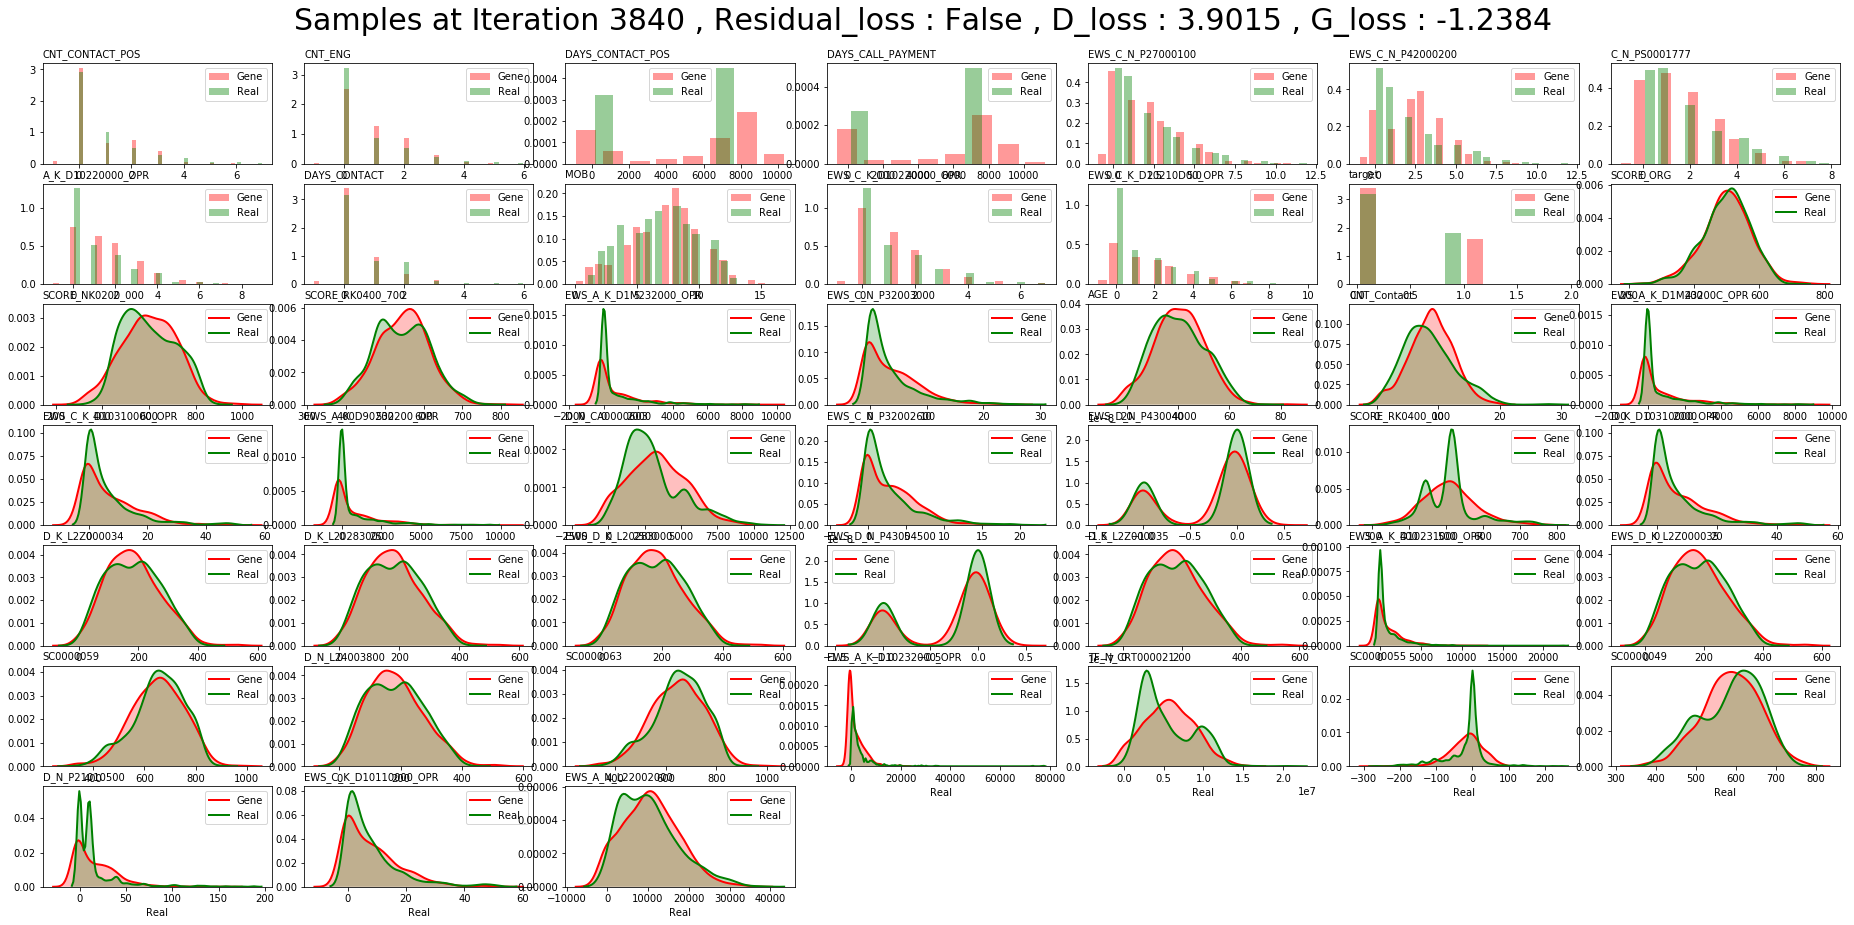

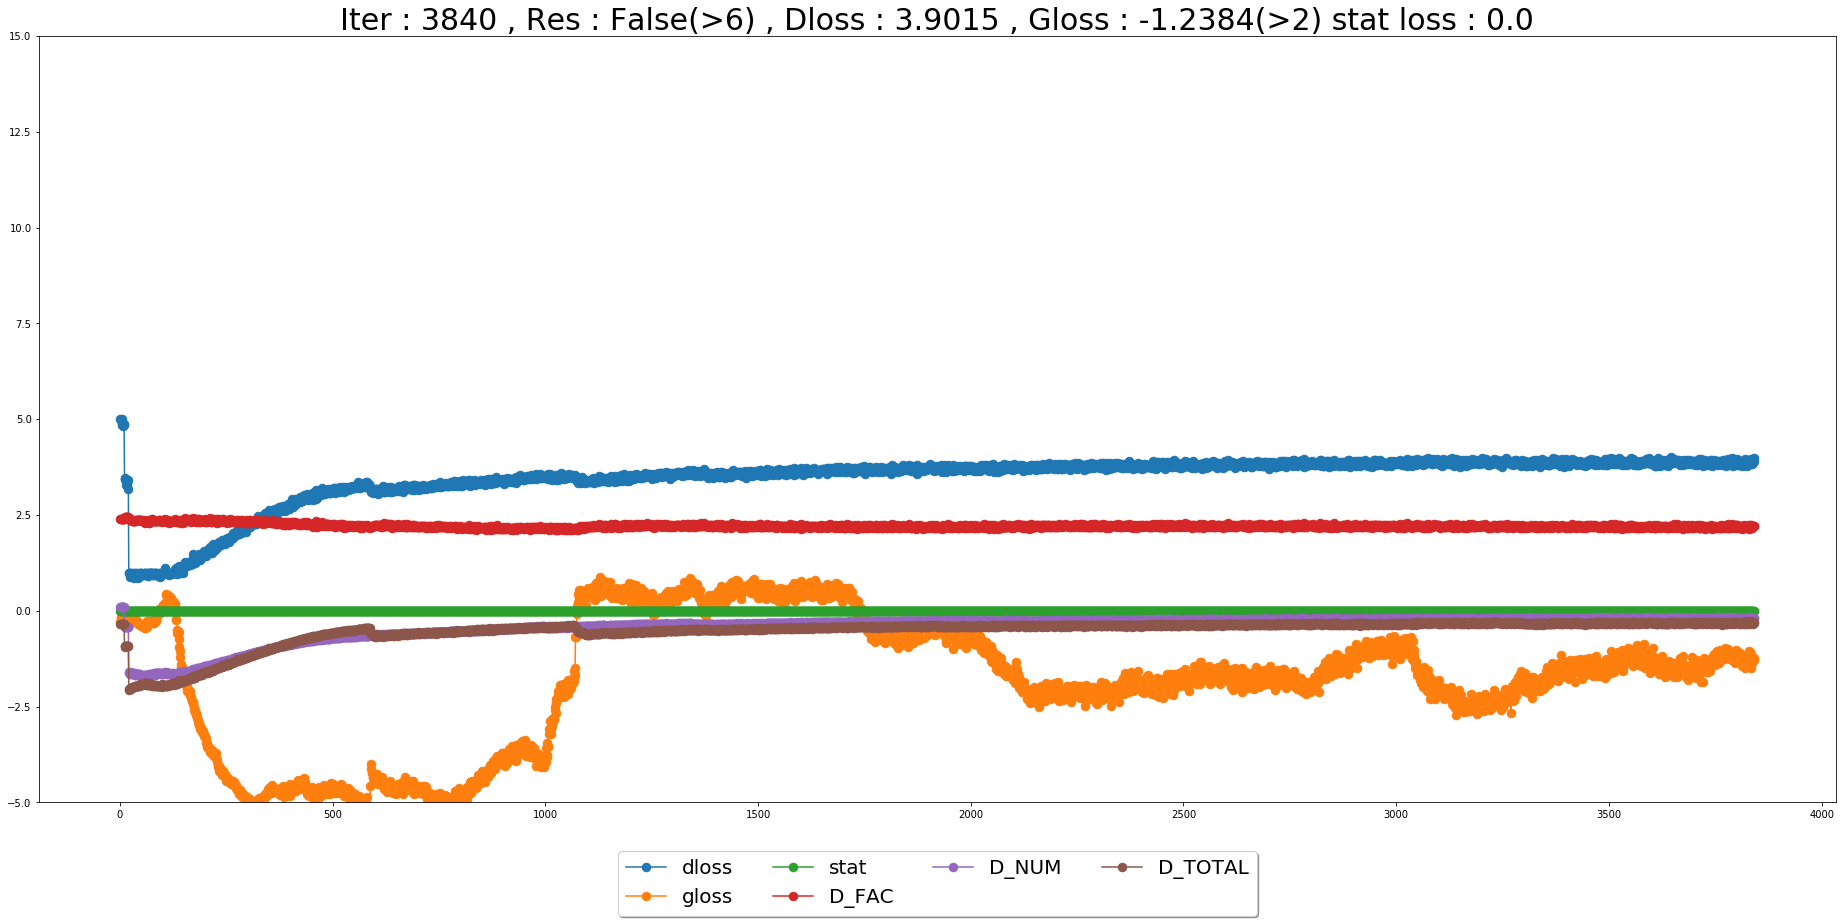

Iteration : 3840 , Gloss[factor] : -0.30240780115127563 , Gloss[num] : 1.336673617362976 , Gloss[total] : -2.2726266384124756
Iteration : 3840 , Dloss[factor] : 2.2059438228607178 , Dloss[num] : -0.18914899230003357 , Dloss[total] : -0.3134302794933319
 3841th  Residual Loss : 3.9089815616607666 
 3842th  Residual Loss : 3.946094036102295 
 3843th  Residual Loss : 3.8717453479766846 
 3844th  Residual Loss : 3.8643195629119873 
 3845th  Residual Loss : 3.916844129562378 
 3846th  Residual Loss : 3.854633092880249 
 3847th  Residual Loss : 3.9575071334838867 
 3848th  Residual Loss : 3.8383443355560303 
 3849th  Residual Loss : 3.908019781112671 
 3850th  Residual Loss : 3.8965370655059814 
 3851th  Residual Loss : 3.8899307250976562 
 3852th  Residual Loss : 3.8239340782165527 
 3853th  Residual Loss : 3.9226717948913574 
 3854th  Residual Loss : 3.933934211730957 
 3855th  Residual Loss : 3.9213850498199463 
 3856th  Residual Loss : 3.8828396797180176 
 3857th  Residual Loss : 3.90644

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

nd_steps = 5
ng_steps = 2

iteration , dloss , res , gloss , stat , dnum , dfac , dtotal = 0 , 0 ,0 , 0 , 0  ,0 ,0 ,0
output = pd.DataFrame({"iter" : [iteration] , "dloss" : [dloss] , "gloss" : [gloss] , "stat" : [stat] , "dfac" :[dfac], "dnum" :[dnum] , "dtotal" :[dtotal] })

learing_rate_d_exp = 1e-4
learing_rate_g_exp = 1e-4
    
for i in range(25001):
    
   
    
#     global_step_count += 1    
#     assign_op = global_step.assign(global_step_count)
    
    noise = np.exp(-i/25000)
    for _ in range(nd_steps):
        X_batch = sample_data(data = data , n=batch_size)
        X_batch_p = get_perturbed_batch(X_batch , noise)
        Z_batch = sample_Z(batch_size , zdim )
        _, dloss  = sess.run([disc_step, Dloss   ], 
                                   feed_dict={learning_rate_d : learing_rate_d_exp , 
                                              X_total : X_batch, 
                                              X_fac : X_batch[: , list(np.arange(0 , len(fac_var))) ] , 
                                              X_num : X_batch[: , list(np.arange(len(fac_var), len(col) )) ] , 
                                              X_total_p : X_batch_p, 
                                              X_fac_p : X_batch_p[: , list(np.arange(0 , len(fac_var))) ] , 
                                              X_num_p : X_batch_p[: , list(np.arange(len(fac_var), len(col) )) ] , 
                                              Z: Z_batch})

    for _ in range(ng_steps):
        _ , gloss , g_loss_fac2 , g_loss_num2 , g_loss_total2 = sess.run([gen_step, Gloss ,  g_loss_fac , g_loss_num , g_loss_total ], 
                                   feed_dict={learning_rate_g : learing_rate_g_exp , Z: Z_batch })

        
    
    if i < 10 : 
        D_limit = 5 
        G_limit = 5 
    elif (i >= 10) & (i < 20) :
        D_limit = 3.5
        G_limit = 3.5
    else : 
        D_limit = 1
        G_limit = 1
    
    dcount = 0 
    while dloss > D_limit : 
        dcount += 1
        
        _ , dloss , d_loss_fac2 , d_loss_num2 , d_loss_total2 = sess.run([disc_step, Dloss , d_loss_fac , d_loss_num , d_loss_total ], 
                                  feed_dict={learning_rate_d :learing_rate_d_exp , 
                                             X_total : X_batch, 
                                             X_fac : X_batch[: , list(np.arange(0 , len(fac_var))) ] , 
                                             X_num : X_batch[: , list(np.arange(len(fac_var), len(col) )) ] , 
                                             X_total_p : X_batch_p, 
                                             X_fac_p : X_batch_p[: , list(np.arange(0 , len(fac_var))) ] , 
                                             X_num_p : X_batch_p[: , list(np.arange(len(fac_var), len(col) )) ] , 
                                             Z: Z_batch})
        
        if dcount > 1000 : 
            print(" {}th  Residual Loss : {} ".format(i, dloss ) )
            break
    gcount = 0 
    while gloss > G_limit :
        gcount += 1 
        
        _, gloss   = sess.run([gen_step, Gloss], 
                                    feed_dict={learning_rate_g : learing_rate_g_exp  , 
                                               Z: Z_batch })

        if gcount > 510 :
            print(" {}th  Generate Loss : {}".format(i, gloss ) )
            break
    
#     if i % 5 == 0 : 
#         clear_output(wait= True)
    
    iteration +=1
    dloss   = dloss
    gloss   = gloss 
    output1 = pd.DataFrame({"iter" : [iteration] , "dloss" : [dloss] , "gloss" : [gloss] , "stat" : [stat] , "dfac" :[d_loss_fac2], "dnum" :[d_loss_num2] , "dtotal" :[d_loss_total2] })
    output  = output.append(output1)
    if i% 30 == 0:
        output = output[output.iter>0]
        dloss = round( np.float64(dloss),4)
        gloss = round( np.float64(gloss),4)
        stat = round( np.float64(stat),4)
        res ="False"
        show_plot(output = output , row = 7 , ncol=7)
        print("Iteration : {} , Gloss[factor] : {} , Gloss[num] : {} , Gloss[total] : {}".format(i , g_loss_fac2 , g_loss_num2 , g_loss_total2))
        print("Iteration : {} , Dloss[factor] : {} , Dloss[num] : {} , Dloss[total] : {}".format(i , d_loss_fac2 , d_loss_num2 , d_loss_total2))
        
#         plt.xlabel('iterations (epochs)')
#         plt.ylabel('learning rate')
#         plt.plot(range(1,global_step_count), rates)
#         plt.savefig("./rates_plot.png")
#         plt.show()


* 결과 정리
    * 4개까지는 잘됨 
    * 8개도 어느정도 잘 되는 것을 확인
    * 12개도 나쁘지 않게 됨.
    * 16개도 잘되는데 그것뿐만 아니라 binary도 너무 잘 학습한다.
    * hidden layer를 늘렸는데 별로 효과가 좋지 않다.
    
 * 개선사항
     * 지금은 fac 와 continuous 한 경우만 나눴지만 **Binary**한 경우도 고려해서 하는게 더 좋다고 함
     * 지금까지는 G = [15,15] 가 먼가 제일 좋았음 [20,20] 꽝!
     * wgan gp 추가 적용
         * LOSS 폭발하는 사건은 SCALE 의 문제 조정해주니 미친 듯이 낮아지진 않음 (더 좋은 성능을 보임)
     * factor 변수에 좀 더 무게감을 실어주기 위해 SSE / n 정도의 loss를 더 추가시켜줬다. 
          * 이러한 부분을 통해 좀 더 그런 쪽에 반응을 하기를 기대하면서
     * 특정조건 만족할 때 까지 제약 주기
     * 왜도와 첨도를 구현해서 같이 넣어줌 약간 힌트같은 벡터를 넣어주고 싶은데 어떤식으로 해야할지..
     * cyclic learning rate 도입해봄 (이상함)
     * adam (beta1 = 0 beta = 0.9 , lr = 0.0001 ) 사용 (wgan gp 저자)
     * bn 안하는게 좋다해서 일단 사용 x
     * learning rate decay를 한 다음 학습이 잘 안될 때는 반대로 올려주는 방식으로 
     * res는 거의 일정하고 gloss는 시간이 오르면 2 정도로 수렴한다. 
     * 시간이 지나니 D는 점점 강해지면서 res loss가 폭발하기도 함
     * G 와 D 자체 loss는 음수다... 흐음....
     * tf.reduce_mean / tf.redcue_sum
     * skew 코드가 이상해짐 지금 있는 코드가 맞는 듯
     * 굳이 통계량 값 안 넣어도 어느정도 따라가는게  많긴 많음 오히려 넣으면 더 불안정 한듯
     * 첨도가 아주 큰 분포는 어떻게 해야 학습이 잘 될까 단순히 뾰족할 분인데
     * 19/01/25 maaping network 넣는 순간 잘 안됨